In [1]:
import numpy as np
import nipy
from nipy import load_image
from nipy.core.api import Image, vox2mni
from nipy.testing import anatfile

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Test af billeder

- Tag 1.5T og 3T og se på følgende:
    - normalized_subject_img.shape == atlas_img.shape

    - normalized_subject_img.coordmap == atlas_img.coordmap
    - np.all(normalized_subject_img.affine == atlas_img.affine)

In [2]:
img_3T_file = "/home/oskar/Skrivebord/002_S_0413_3T/002_S_0413/ADNI_002_S_0413_MR_MPR____N3__Scaled_Br_20070216232854688_S14782_I40657.nii"
#img_3T_file = r"C:/Users/ander/Desktop/ADNI_imgs/ADNI_002_S_1261_MR_MPR____N3__Scaled_Br_20070807144436756_S27226_I65561.nii"

In [3]:
img_1_5T_file = "/home/oskar/Skrivebord/002_S_0413/ADNI_002_S_0413_MR_MP-RAGE__br_raw_20060502142705523_1_S13893_I14437.nii"
#img_1_5T_file = r"C:/Users/ander/Desktop/ADNI_imgs/ADNI_002_S_1261_MR_MP-RAGE__br_raw_20070215222716793_1_S26574_I40503.nii"

In [4]:
img_3T = load_image(img_3T_file)
img_1_5T = load_image(img_1_5T_file)

In [5]:
print(f'The shape of 3T: {img_3T.shape}') ; print(f'The shape of 1.5T: {img_1_5T.shape}')
img_3T.shape == img_1_5T.shape

The shape of 3T: (256, 256, 170)
The shape of 1.5T: (166, 256, 256, 1)


False

In [6]:
#for i in range(200//5):
#    plt.imshow(img_1_5T[:,:,i*5])
#    plt.show()

In [9]:
img_1_5T = np.squeeze(img_1_5T)
print(f'The shape of 3T: {img_3T.shape}') ; print(f'The shape of 1.5T: {img_1_5T.shape}')
img_1_5T = np.transpose(img_1_5T, (2, 1, 0))
print(f'The shape of 3T: {img_3T.shape}') ; print(f'The shape of 1.5T: {img_1_5T.shape}')
img_1_5T = np.flip(np.flip(img_1_5T, 0), 1)
print(f'The shape of 3T: {img_3T.shape}') ; print(f'The shape of 1.5T: {img_1_5T.shape}')
img_3T = img_3T[:,:,:166]
print(f'The shape of 3T: {img_3T.shape}') ; print(f'The shape of 1.5T: {img_1_5T.shape}')
img_3T.shape == img_1_5T.shape

The shape of 3T: (256, 256, 166)
The shape of 1.5T: (166, 256, 256)
The shape of 3T: (256, 256, 166)
The shape of 1.5T: (256, 256, 166)
The shape of 3T: (256, 256, 166)
The shape of 1.5T: (256, 256, 166)
The shape of 3T: (256, 256, 166)
The shape of 1.5T: (256, 256, 166)


True

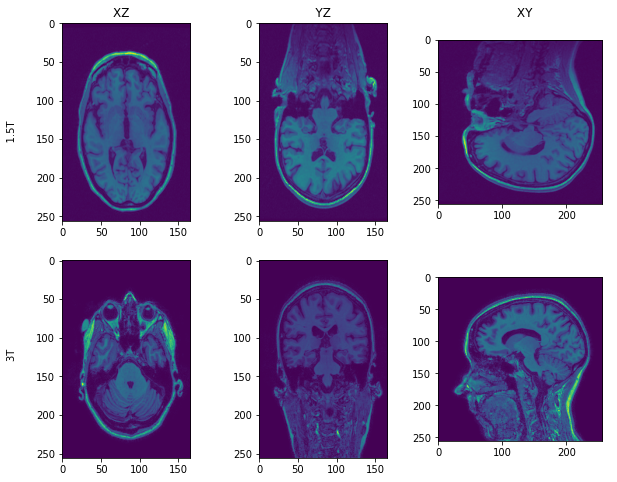

In [10]:
# Construct plot for report
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10, 8))
f.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax1.imshow(img_1_5T[150,:,:])
plt.title('XZ                                                YZ                                                XY')
ax4.imshow(img_3T[140,:,:])
plt.ylabel('3T                                                                  1.5T')
ax2.imshow(img_1_5T[:,150,:])
ax5.imshow(img_3T[:,150,:])
ax3.imshow(img_1_5T[:,:,95])
ax6.imshow(img_3T[:,:,95])
plt.savefig("fuckery.pdf")

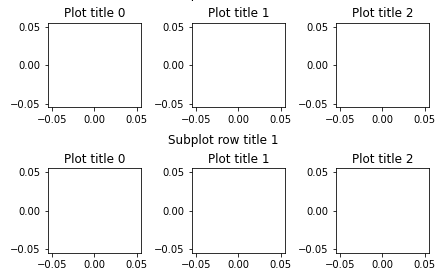

In [11]:
fig = plt.figure(constrained_layout=True)

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'Subplot row title {row}')

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        ax.plot()
        ax.set_title(f'Plot title {col}')
plt.show()

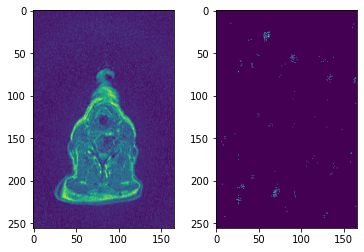

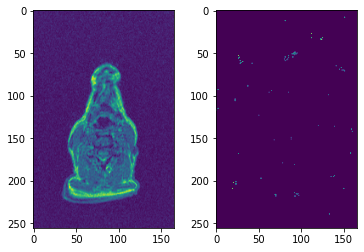

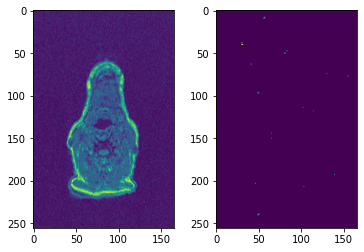

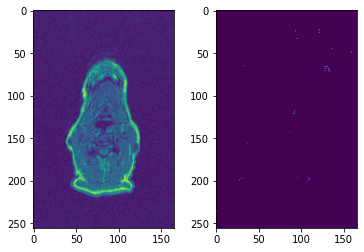

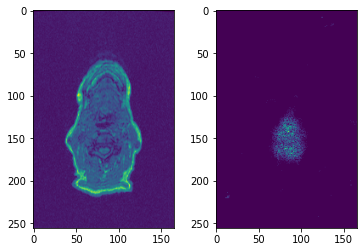

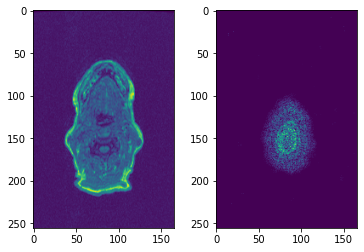

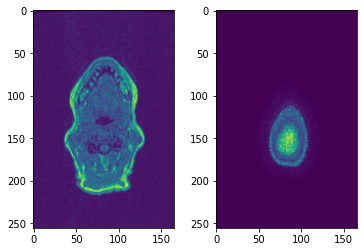

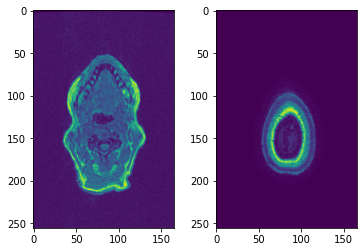

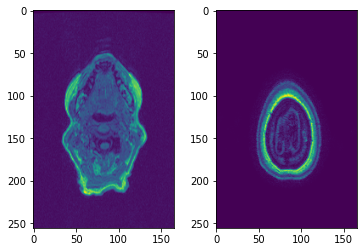

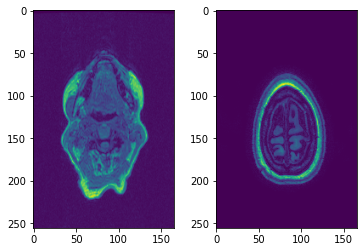

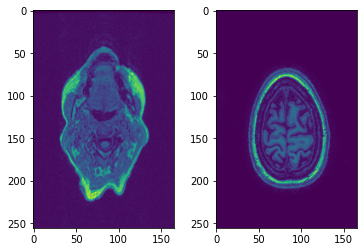

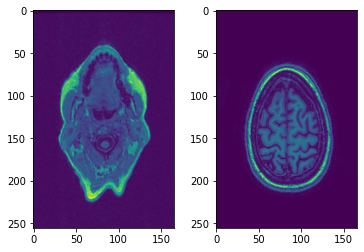

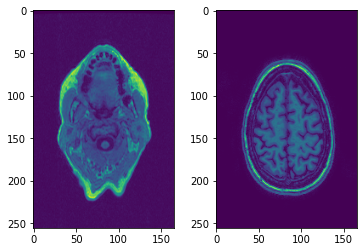

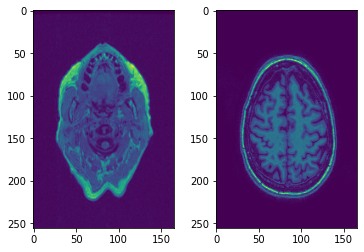

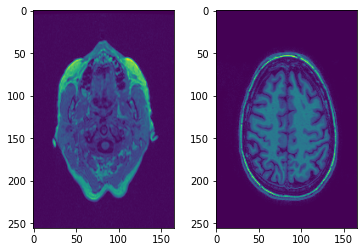

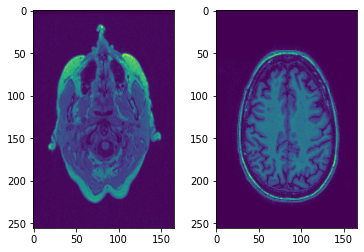

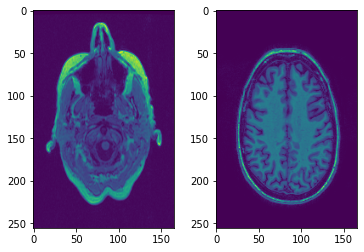

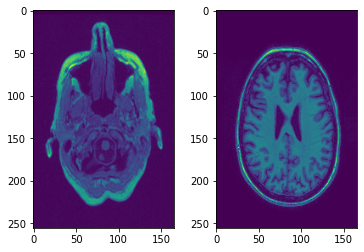

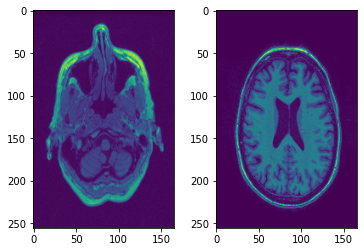

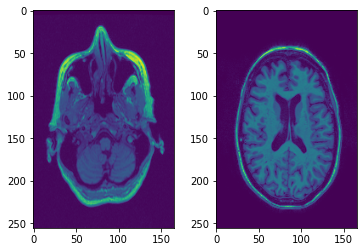

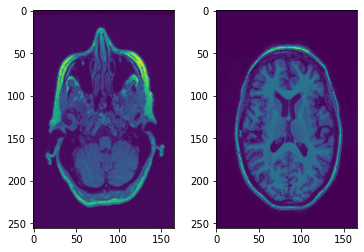

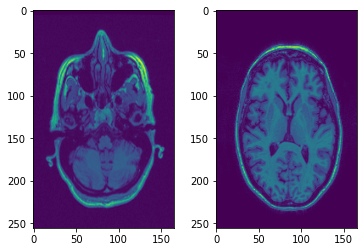

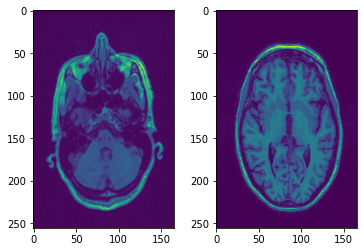

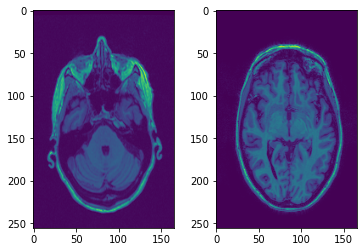

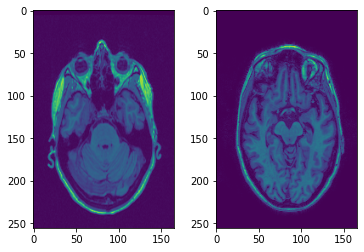

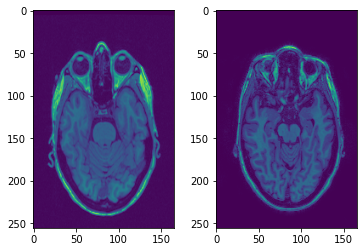

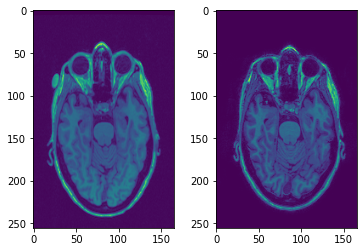

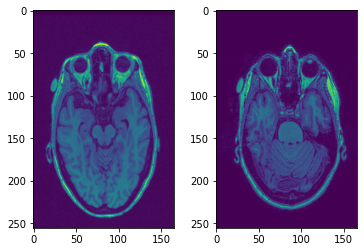

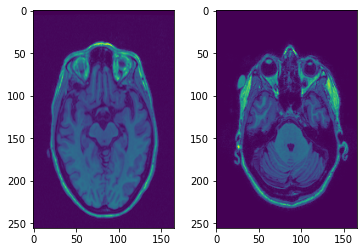

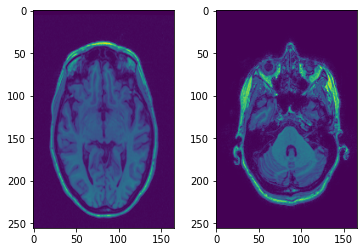

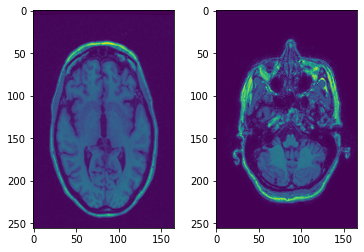

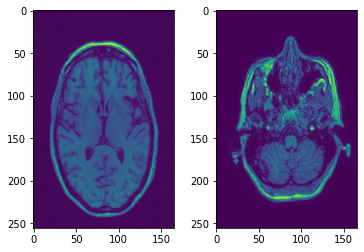

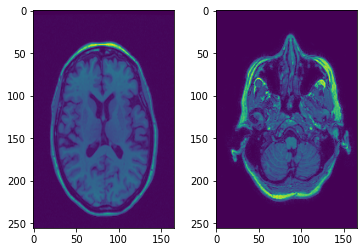

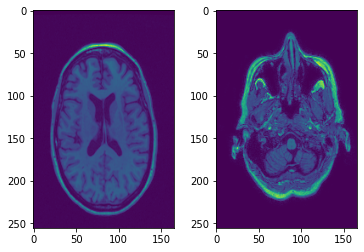

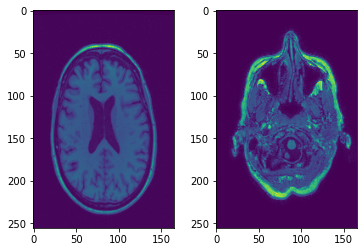

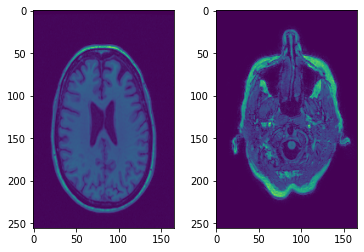

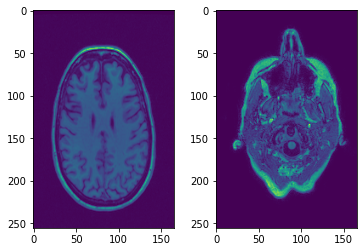

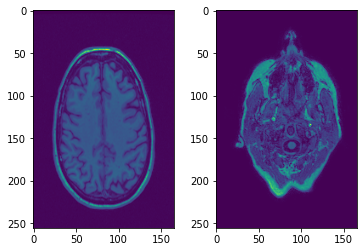

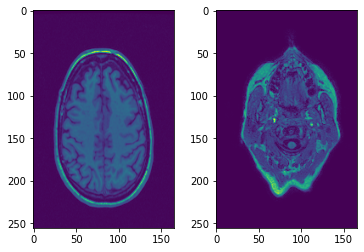

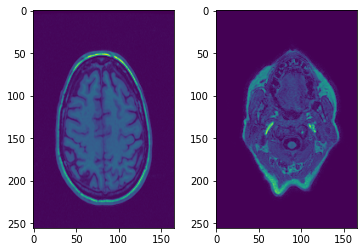

In [12]:
for i in range(200//5):
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img_1_5T[i*5,:,:])
    ax2.imshow(img_3T[i*5,:,:])
    plt.show()

In [60]:
import nibabel as nib
nib.save(nib.Nifti1Image(img_1_5T, np.eye(4)), r"C:/Users/ander/Desktop/ADNI_imgs/1,5T_alligned_new_new.nii")
nib.save(nib.Nifti1Image(img_3T, np.eye(4)), r"C:/Users/ander/Desktop/ADNI_imgs/3T_alligned_new_new.nii")